In [1]:
# Read in the Star Wars Survey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
# Let's see what the first 10 rows look like
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [3]:
# Let's see what the column names look like
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
# now let's remove those rows that have NaN for Respondent ID
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [5]:
# Now let's convert the values of Yes/No's to True/False's
yes_no = {
    "Yes":True,
    "No":False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [6]:
# Let's convert the values in each of the columns that denote whether someone has seen the move in the column title with boolean values
seen_movies_dict = {
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.NaN:False
}

# create a list variable with each of the movie columns
movie_columns = star_wars.columns[3:9]

# for loop for mapping each of the values with the dictionary above
for i in movie_columns:
    star_wars[i] = star_wars[i].map(seen_movies_dict)


In [7]:
# rename the columns
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
})

In [8]:
star_wars["seen_6"].value_counts()

True     738
False    448
Name: seen_6, dtype: int64

In [9]:
# convert the columns that have score values to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars[star_wars.columns[9:15]].head(10)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [10]:
# rename the score columns
star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
})

In [11]:
star_wars["ranking_3"].value_counts()

6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64

In [12]:
# run the below line to make sure that the matplotlib graphs appear on this spreadsheet
%matplotlib inline

<BarContainer object of 6 artists>

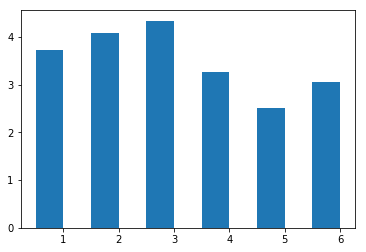

In [13]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = star_wars[star_wars.columns[9:15]].mean()

ax.bar(bar_positions, bar_heights, 0.5)

# Analysis of Scores

So far, we've cleaned up the column names and have found the mean of each movie's score. From looking at the bar plot of the mean values above, it looks like Empire Strikes Back is the most liked Star Wars movie of the series, followed by Return of the Jedi with A New Hope hot on its tail.

The fact that the original trilogy (Episodes 4 - 6) are more liked than Episodes 1 - 3 does not surprise me. A lot of fans out there panned Episode 1 through 3. It's hard to live up to the originals.

In [14]:
# compute the sum of each of the seen columns
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

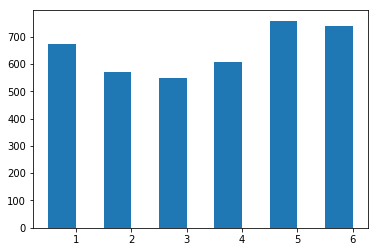

In [15]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = star_wars[star_wars.columns[3:9]].sum()

ax.bar(bar_positions, bar_heights, 0.5)

# Analysis of number of folks who have seen each Star Wars Film

Interestingly, Empire Strikes Back had the most viewers of those who took the survey. It looks like even the Episode 1 garnered more viewers (according to this survey) than Episode IV, probably due to the initial excitement to see the continuation of the Star Wars story. However, the amount of viewers dropped thereafter, probably due to fans not liking Episode 1 and not wishing to see any of the others in the prequel trilogy.

It does appear that there is positive correlation between the number of viewers of a film and the more liked a movie is.

# Now let's do an analysis of Star Wars fans and non-Star Wars fans


In [16]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]

# Fans

<BarContainer object of 6 artists>

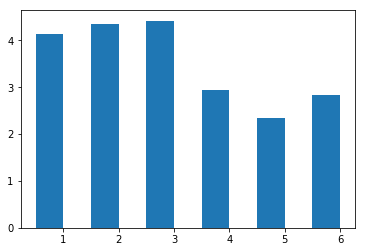

In [17]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = fans[fans.columns[9:15]].mean()

ax.bar(bar_positions, bar_heights, 0.5)

<BarContainer object of 6 artists>

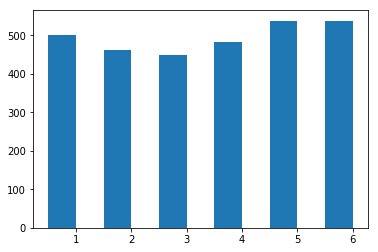

In [18]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = fans[fans.columns[3:9]].sum()

ax.bar(bar_positions, bar_heights, 0.5)

# Non-fans

<BarContainer object of 6 artists>

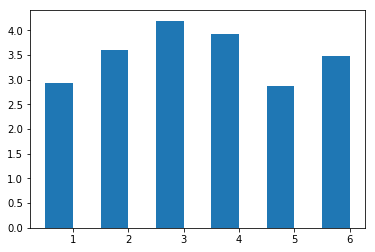

In [19]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = non_fans[non_fans.columns[9:15]].mean()

ax.bar(bar_positions, bar_heights, 0.5)

<BarContainer object of 6 artists>

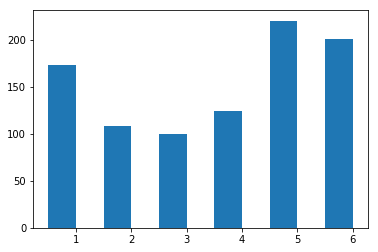

In [20]:
# make a figure
fig, ax = plt.subplots()

# make the bar positions
bar_positions = np.arange(6) + 0.75

# make the bar heights values
bar_heights = non_fans[non_fans.columns[3:9]].sum()

ax.bar(bar_positions, bar_heights, 0.5)

# Conclusion

Fans and non-fans can agree that Empire Strikes Back is the favorite film of the franchise.